# Feature Engineering: Feature Creation

### Read in text

In [2]:
import pandas as pd

data = pd.read_csv("data/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


### Create feature for text message length

In [3]:
# Hypothesis : Spam messages are longer than text messages
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" ")) # Exclude whitespaces from count

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


### Create feature for % of text that is punctuation

In [5]:
import string

# Hypothesis : Ham messages use less punctuations than Spam

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    # Return percentage of punctuation in text
    return round(count/(len(text)-text.count(" ")), 3) * 100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Evaluate created features

In [7]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

c:\users\rojin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
c:\users\rojin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


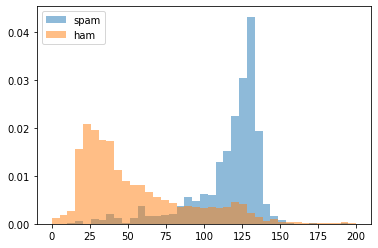

In [10]:
# Histograms for the feature 'body_len'

bins = np.linspace(0, 200, 40) # 40 evenly spaced numbers between 0 ans 200
alpha = 0.5 # How dark the shading will be
normed = True # Standardization

pyplot.hist(data[data['label']=='spam']['body_len'], bins= bins, alpha = alpha, normed = normed, label= 'spam')

pyplot.hist(data[data['label']=='ham']['body_len'], bins= bins, alpha = alpha, normed = normed, label= 'ham')

pyplot.legend(loc= 'upper left')
pyplot.show()

From the histograms, we can observe that the body_length for Spam emails are much higher in general than the body_length of Ham emails. Here, the feature can be useful for our model.

c:\users\rojin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
c:\users\rojin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


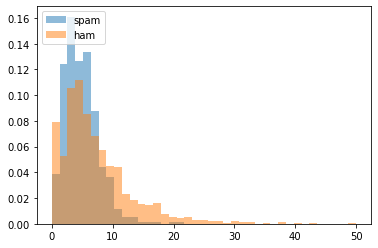

In [11]:
# Histograms for the feature 'punct%'

bins = np.linspace(0, 50, 40) # 40 evenly spaced numbers between 0 and 200
alpha = 0.5 # How dark the shading will be
normed = True # Standardization

pyplot.hist(data[data['label']=='spam']['punct%'], bins= bins, alpha = alpha, normed = normed, label= 'spam')

pyplot.hist(data[data['label']=='ham']['punct%'], bins= bins, alpha = alpha, normed = normed, label= 'ham')

pyplot.legend(loc= 'upper left')
pyplot.show()

From the histograms, we can observe that the % of punctuation for Spam emails are not that different than the % of punctuation of Ham emails. Thus, it isn't quite clear if the above feature will provide much value to the model.